# Problem set: Jupyter, pyplot and numpy

<div class="alert alert-block alert-info">The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis.</div><br>
The dataset contains five variables: *sepal length*, *sepal width*, *petal length*, *petal width*, and *species*.<br>
Each row of the table represents an iris flower, including its species and dimensions of its botanical parts, sepal and petal, in centimeters.

Adapted from: *https://en.wikipedia.org/wiki/Iris_flower_data_set*

In [83]:
# numpy efficiently deals with numerical multi-dimensional arrays.
import numpy as np

# matplotlib is a plotting library, and pyplot is its easy-to-use module.
import matplotlib.pyplot as pl
import matplotlib.patches as mpatches

# This just sets the default plot size to be bigger.
pl.rcParams['figure.figsize'] = (16.0, 8.0)

In [65]:
# https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.genfromtxt.html
sepal_length = np.genfromtxt('IRIS.csv', delimiter=',', usecols=(0))
sepal_width = np.genfromtxt('IRIS.csv', delimiter=',', usecols=(1))
petal_length = np.genfromtxt('IRIS.csv', delimiter=',', usecols=(2))
petal_width = np.genfromtxt('IRIS.csv', delimiter=',', usecols=(3))
species = np.genfromtxt('IRIS.csv', delimiter=',', usecols=(4), dtype=None)

<div class="alert alert-block alert-info">Finding the best fit for sepal_length and sepal_width</div>

In [66]:
m, c = np.polyfit(sepal_length, sepal_width, 1)
print("Best fit is m = %f and c = %f" % (m, c))

Best fit is m = -0.062975 and c = 3.424917


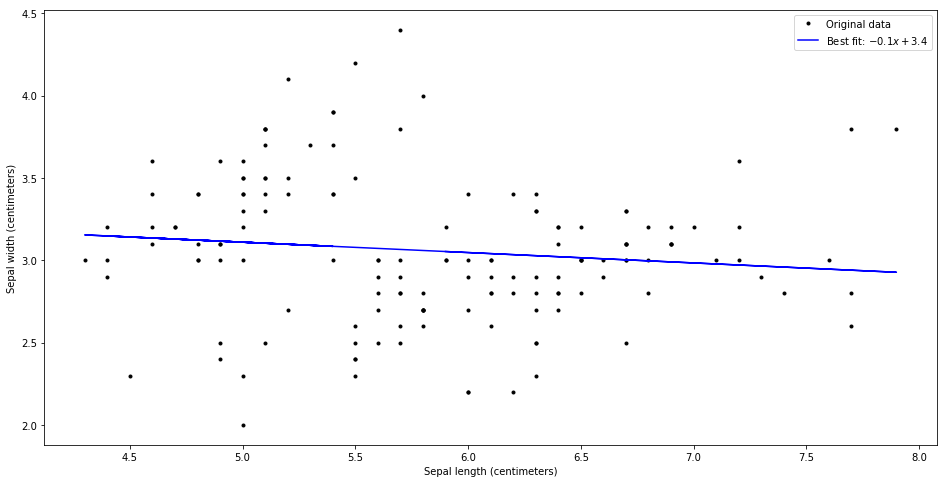

In [67]:
pl.plot(sepal_length, sepal_width, 'k.', label='Original data')
pl.plot(sepal_length, m * sepal_length + c, 'b-', label='Best fit: $%0.1f x + %0.1f$' % (m,c))
pl.xlabel('Sepal length (centimeters)')
pl.ylabel('Sepal width (centimeters)')
pl.legend()
pl.show()

In [121]:
dataset = np.genfromtxt('IRIS.csv', delimiter=',', dtype=None)
flower_type = [x[4] for x in dataset]

In [122]:
for i in range(0,len(dataset)-1):
    x, y = [dataset[i][0], dataset[i][1]]
    scale = 100.0
    # determine color
    flower = flower_type[i].decode("utf-8")
    color = ""
    if flower == "I.setosa":
        color = "red"
    elif flower == "I.versicolor":
        color = "green"
    elif flower == "I.virginica":
        color = "blue"

    pl.scatter(x, y, s=scale, c=color, alpha=1, edgecolor="none")

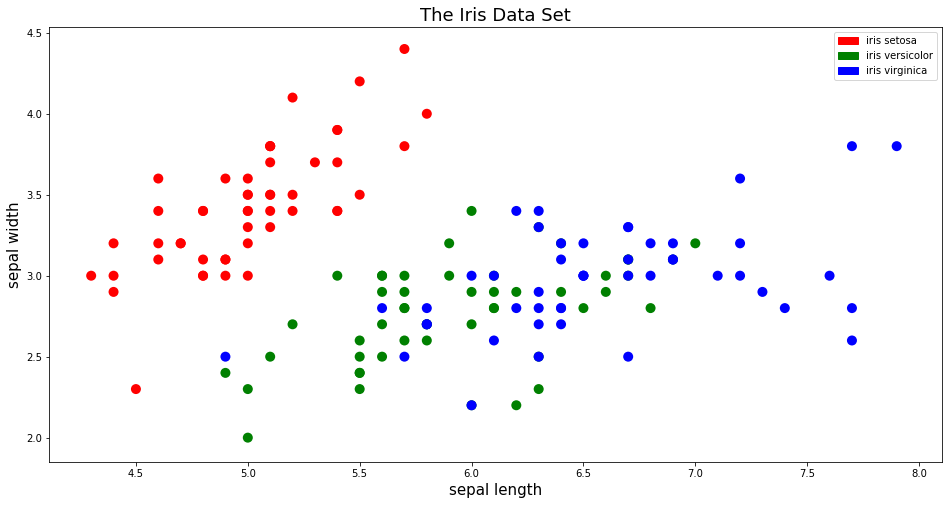

In [123]:
# Legend
red_patch = mpatches.Patch(color='red', label='iris setosa')
green_patch = mpatches.Patch(color='green', label='iris versicolor')
blue_patch = mpatches.Patch(color='blue', label='iris virginica')
pl.legend(handles=[red_patch, green_patch, blue_patch])

pl.title("The Iris Data Set", fontsize=18)
pl.xlabel(r'sepal length', fontsize=15)
pl.ylabel(r'sepal width', fontsize=15)

pl.show()